# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

Prepared by : Ricky Ariansyah

Batch : Vulcan DA Online

## Background / Latar Belakang

Web Scrapping dan analisa data pekerjaan di indonesia pada website kalibrr 

`https://www.kalibrr.id/job-board/te/data/1`

Goals :

1. Dari Halaman tersebut carilah title pekerjaan , lokasi pekerjaan , tanggal pekerjaan di post dan dealine submit permohonan, dan perusahaan
2. tariklah 15 halaman
3. Buatlah plot dari jumlah pekerjaan berdasarkan lokasi.


Rubrics : 

[2 points] Environment preparation [x]

[5 points] Finding the right key to scrap the data & Extracting the right information [x]

[5 points] Creating data frame & Data wrangling [x]

[2 points] Creating a tidy python notebook as a report [x]
 
[2 points] Implement it on Flask dashboard [x]


### Detil

1. Struktur URL - `https://www.kalibrr.id/job-board/te/data/1` 

`https://www.kalibrr.id/` -> adalah base_url / url utama
`/te/data/1` -> adalah endpoint, angka 1 pada endpoint tersebut adalah represntasi halaman yang sedang diakses




## Dependencies

- beautifulSoup4
- pandas
- flask
- matplotlib

Atau Bapak Ibu cukup menginstall requirements.txt dengan cara berikut

```python
pip install -r requirements.txt
```

## Create / Reproducible environment


1. Aktifkan environment
```
conda create --name "vulcan_capstone"
```

2. Install depedencies
```
pip install  nama_dependy==versi
```  

3. Export environment: membuat daftar packages beserta versinya.
```
pip list --format=freeze > requirements.txt
```

## Import Enviroment

1. Aktifkan environment yang ingin digunakan
    ```
    conda activate <ENV_NAME>
    ```

2. Navigasikan path ke folder di mana file `requirements.txt` / atau sesuai dengan nama export enviroment diatas berada
    ```
    cd <PATH_TO_REQUIREMENTS>
    ```

3. Instalasi packages dari file tersebut
    ```
    pip install -r requirements.txt / nama file txt
    ```

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [5]:
import requests
import pandas as pd
import os
os.environ['TZ'] = 'Asia/Jakarta'
url_get = requests.get('https://www.kalibrr.id/job-board/te/data/1')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [6]:
url_get.content[1:500]

b'!DOCTYPE html><html lang="en"><head><meta name="viewport" content="width=device-width"/><meta charSet="utf-8"/><script type="application/ld+json">{\n    "@context": "https://schema.org",\n    "@type": "WebSite",\n    "url": "https://www.kalibrr.com",\n    "potentialAction": [\n      {\n        "@type": "SearchAction",\n        "target": "https://www.kalibrr.com/job-board/te/={search_term_string}",\n        "query-input": "required name=search_term_string"\n      }\n     ]\n  }</script><meta property="og:i'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [7]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Berikut adalah langkah langkah untuk mengestrak data data pada web kalibrr

**1. Mencari Page Terakhir atau Total Page**

pada halaman list pekerjaan di kalibrr dapat kita lihat pagination, total page / total halaman dapat kita ambil sebelum tanda panah yang paling kanan (tombol next page), kemudian kita ambil content sebelumnya


In [8]:
print(soup.find('ul', {"class" : "k-flex k-justify-center k-items-center k-my-8"}).find_all('li')[-2].get_text())

total_page = int(soup.find('ul', {"class" : "k-flex k-justify-center k-items-center k-my-8"}).find_all('li')[-2].get_text())

print(f"Total Page : {total_page}")


60
Total Page : 60


**2. Ekstrasi data Pekerjaan dari list card**

pada halaman list pekerjaan di kalibrr dapat kita lihat list card tampilan pekerjaan, pada card ini terdapat data yang perlu kita ekstrak


kita akan ambil semua tag div yang mempunyai atribut :

1. itemscope: true
2. itemtype: "http://schema.org/ListItem"
3. itemprop: "itemListElement"

In [9]:
list_job = soup.find_all('div', {'itemscope': True, 'itemtype' : 'http://schema.org/ListItem','itemprop' : "itemListElement"})

hasilnya akan berbentuk larik / array html yang dapat kita looping

kita lihat hasil index 0 untuk tag yang kita find_all diatas

In [10]:
print(list_job[0].prettify())

<div class="k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6" itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem">
 <a class="k-bg-white k-flex k-items-center k-flex-shrink k-justify-center k-text-4xl k-text-subdued k-overflow-hidden k-px-4 k-py-2 k-row-span-4" href="/c/pgi-data/jobs">
  <div>
   <img alt="PGI Data" class="k-block k-max-w-full k-max-h-full k-bg-white k-mx-auto" decoding="async" height="80" loading="eager" src="https://rec-data.kalibrr.com/www.kalibrr.com/logos/Z7AL3F4XGKPLCEW9TFDFDZK33247MQ8J9PSHES26-6080167e.png" width="130"/>
  </div>
 </a>
 <div class="k-col-start-3 k-row-start-1">
  <h2 class="k-text-xl k-font-medium">
   <a class="k-text-primary-color" href="/c/pgi-data/jobs/174503/net-developer" itemprop="name">
    .Net Developer
   </a>
  </h2>
 </div>
 <style data-emotion="css 1gzvnis">
  .css-1gzvnis{display:-webkit-box!important;-webkit-line-clamp:2;-webkit-box-orient:vertical;}
 </style>
 <div class="k-text

import library tambahan datetime untuk mengekstraksi data tanggal dikarenakan pada web berbentuk string, dan ini perlu kita convert ke dalam format datetime string agar dapat dengan mudah kita proses saat sudah menjadi data frame

In [11]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta


membuat fungsi untuk ekstraksi string ke datetime string

contoh masukkan : "a day ago"

contoh keluaran : "2023 05 13"

In [12]:
def get_past_date(str_days_ago):
    TODAY = datetime.today()
    splitted = str_days_ago.split()
    if len(splitted) == 1 and splitted[0].lower() == 'today':
        return str(TODAY.isoformat())
    elif len(splitted) == 1 and splitted[0].lower() == 'yesterday':
        date = TODAY - relativedelta(days=1)
        return str(date.isoformat())
    elif splitted[1].lower() in ['minute', 'minutes', 'mins', 'min', 'm']:
        return str(TODAY.isoformat())
    elif splitted[1].lower() in ['hour', 'hours', 'hr', 'hrs', 'h']:
       return str(TODAY.isoformat())
    elif splitted[1].lower() in ['day', 'days', 'd']:
        if splitted[0].isdigit():
            date = TODAY - relativedelta(days=int(splitted[0]))
            return str(date.isoformat())
        else:
            date = TODAY - relativedelta(days=int(1))
            return str(date.isoformat())
    elif splitted[1].lower() in ['wk', 'wks', 'week', 'weeks', 'w']:
        if splitted[0].isdigit():
            date = TODAY - relativedelta(weeks=int(splitted[0]))
            return str(date.isoformat())
        else:
            date = TODAY - relativedelta(weeks=int(1))
            return str(date.isoformat())
    elif splitted[1].lower() in ['mon', 'mons', 'month', 'months', 'm']:
        if splitted[0].isdigit():
         date = TODAY - relativedelta(months=int(splitted[0]))
         return str(date.isoformat())
        else:
         date = TODAY - relativedelta(months=int(1))
         return str(date.isoformat())
    elif splitted[1].lower() in ['yrs', 'yr', 'years', 'year', 'y']:
        if splitted[0].isdigit():
            date = TODAY - relativedelta(years=int(splitted[0]))
            return str(date.isoformat())
        else:
            date = TODAY - relativedelta(years=int(1))
            return str(date.isoformat())
    else:
        return "Wrong Argument format"

get tahun sekarang karena kita berpatokan pada tahun berjalan

In [13]:
datetime.now().year

2023

ekstraksi data list pekerjaan, kita akan loop variabel `list_job`

In [14]:
#mapping untuk ganti bahasa kota dari inggris ke indonesia secara statis
mapping = {
    'South Jakarta': 'Jakarta Selatan', 
    'West Jakarta': 'Jakarta Barat', 
    'North Jakarta': 'Jakarta Utara', 
    'East Jakarta':'Jakarta Timur', 
    'Jakarta':'Jakarta Pusat', 
    'South Tangerang': 'Tangerang Selatan', 
    'Bandung Kota':'Bandung', 
    'Bandung Kabupaten':'Bandung', 
    'Bogor Kota':'Bogor', 
    'Central Jakarta': 'Jakarta Pusat', 
    'Central Jakarta City': 
    'Jakarta Pusat', 
    'Central Lampung': 
    'Lampung', 
    'Kota Jakarta Barat': 'Jakarta Barat', 
    'Kota Jakarta Pusat':'Jakarta Pusat', 
    'Kota Jakarta Selatan':'Jakarta Selatan'}

In [15]:
for item in list_job:
    # nama pekerjaan terdapat pada tag h2 > a
            job_title = item.select_one('h2 a').get_text().strip()
            # tanggal post kita tag turunan beserta class nya kemudian kita ekstrak test dan split ambil index 0 dan replace Posted, kemudian convert
            post_date = datetime.strptime(
                get_past_date(
                item.select_one("div.k-col-start-5 span:first-of-type").text.strip().split("•")[0].strip().replace("Posted", "")
                ), 
                "%Y-%m-%dT%H:%M:%S.%f"
                ).strftime('%Y-%m-%d %H:%M:%S').split()[0] + ""
            # deadline kita tag turunan beserta class nya kemudian kita ekstrak test dan split ambil index 1 dan replace Apply before kemudian + tahun sekarang, kemduain ganti format agar sama dengan tanggal post diatas
            date_posting = item.select_one("div.k-col-start-5 span:first-of-type").text.strip().split("•")[1].strip().replace("Apply before", "").strip() + " " + str(datetime.now().year)
            deadline_date = datetime.strptime(date_posting, '%d %b %Y') + timedelta(days=1)
            deadline_date = deadline_date.strftime('%Y-%m-%d %H:%M:%S').split()[0] + ""
            # lokasi kota kita ambil tag turunan beserta class nya lalu ambil text kemudian ambil index [0], kita replace bahasa kota yang belum sesuai dengan mapping
            nama_kota = item.select_one("div.k-col-start-3 div.k-flex > a").text.strip().split(",")[0]
            nama_kota_new = nama_kota.replace(nama_kota, mapping.get(nama_kota, nama_kota))
            # lokasi negara kita ambil tag turunan beserta class nya lalu ambil text kemudian ambil index [1]
            country = item.select_one("div.k-col-start-3 div.k-flex > a").text.strip().split(",")[1].strip()
          

          
            # print(f"Nama Pekerjaan : {job_title}")
            # print(f'Tanggal Post : {post_date}') 
            # print(f"Tanggal Deadline : {deadline_date}")
            # print(f'Lokasi Kota : {nama_kota_new}')
            # print(f'Lokasi Negara : {country}')
            # print("\n")

In [22]:
# membuat function scarapping halaman
def function_scrapping(page = 1):
    # Inisiasi awal
    base_url = 'https://www.kalibrr.id/job-board/te/data/'
    url_get = requests.get(base_url + str(1))
    soup = BeautifulSoup(url_get.content,"html.parser")

    #  Total Page 
    total_page = int(soup.find('ul', {"class" : "k-flex k-justify-center k-items-center k-my-8"}).find_all('li')[-2].get_text())
    print(f"Total Page : {total_page}")

    # inisiasi list kosong
    temp = [] #initiating a list
   
    print(f"Start Scrapping {base_url}")

    page_scrap = page if page > 1 else total_page
    for i in range(1, page_scrap + 1):
        progress = round((i / page_scrap) * 100) # untuk menampilkan presentasi progress pada terminal
        
        print(f"{progress}% | page {i} dari {page_scrap} Pages")

        url = 'https://www.kalibrr.id/job-board/te/data/' + str(i)
        url_get = requests.get(url)
        soup = BeautifulSoup(url_get.content,"html.parser")
    
        list_job = soup.find_all('div', {'itemscope': True, 'itemtype' : 'http://schema.org/ListItem','itemprop' : "itemListElement"})

        for item in list_job:
            # nama pekerjaan terdapat pada tag h2 > a
            job_title = item.select_one('h2 a').get_text().strip()
            # tanggal post kita tag turunan beserta class nya kemudian kita ekstrak test dan split ambil index 0 dan replace Posted, kemudian convert
            post_date = datetime.strptime(
                get_past_date(
                item.select_one("div.k-col-start-5 span:first-of-type").text.strip().split("•")[0].strip().replace("Posted", "")
                ), 
                "%Y-%m-%dT%H:%M:%S.%f"
                ).strftime('%Y-%m-%d %H:%M:%S').split()[0] + ""
            # deadline kita tag turunan beserta class nya kemudian kita ekstrak test dan split ambil index 1 dan replace Apply before kemudian + tahun sekarang, kemduain ganti format agar sama dengan tanggal post diatas
            date_posting = item.select_one("div.k-col-start-5 span:first-of-type").text.strip().split("•")[1].strip().replace("Apply before", "").strip() + " " + str(datetime.now().year)
            deadline_date = datetime.strptime(date_posting, '%d %b %Y') + timedelta(days=1)
            deadline_date = deadline_date.strftime('%Y-%m-%d %H:%M:%S').split()[0] + ""
            # lokasi kota kita ambil tag turunan beserta class nya lalu ambil text kemudian ambil index [0], kita replace bahasa kota yang belum sesuai dengan mapping
            nama_kota = item.select_one("div.k-col-start-3 div.k-flex > a").text.strip().split(",")[0]
            nama_kota_new = nama_kota.replace(nama_kota, mapping.get(nama_kota, nama_kota))
            # lokasi negara kita ambil tag turunan beserta class nya lalu ambil text kemudian ambil index [1]
            country = item.select_one("div.k-col-start-3 div.k-flex > a").text.strip().split(",")[1].strip()
          

          
            # print(f"Nama Pekerjaan : {job_title}")
            # print(f'Tanggal Post : {post_date}') 
            # print(f"Tanggal Deadline : {deadline_date}")
            # print(f'Lokasi Kota : {nama_kota_new}')
            # print(f'Lokasi Negara : {country}')
            # print("\n")
    
            temp.append({
                "job_title" : job_title,
                "city" : nama_kota_new,
                "country" : country,
                "date_post": post_date,
                "date_deadline": deadline_date
            })


    df = pd.DataFrame(temp)
    df.to_csv('kalibrr-job-list.csv', index=False)

In [23]:
function_scrapping(15)

Total Page : 60
Start Scrapping https://www.kalibrr.id/job-board/te/data/
7% | page 1 dari 15 Pages
13% | page 2 dari 15 Pages
20% | page 3 dari 15 Pages
27% | page 4 dari 15 Pages
33% | page 5 dari 15 Pages
40% | page 6 dari 15 Pages
47% | page 7 dari 15 Pages
53% | page 8 dari 15 Pages
60% | page 9 dari 15 Pages
67% | page 10 dari 15 Pages
73% | page 11 dari 15 Pages
80% | page 12 dari 15 Pages
87% | page 13 dari 15 Pages
93% | page 14 dari 15 Pages
100% | page 15 dari 15 Pages


## Creating data frame & Data wrangling

Put the array into dataframe

In [24]:
data = pd.read_csv("kalibrr-job-list.csv")
data.head()

,job_title,city,country,date_post,date_deadline
0,.Net Developer,Jakarta Pusat,Indonesia,2023-05-08,2023-05-20
1,Data Analytics Manager,Jakarta Barat,Indonesia,2023-05-03,2023-05-31
2,DevOps and Data Engineer,Tangerang Selatan,Indonesia,2023-05-05,2023-08-26
3,Data Analytic Specialist ETL,Tangerang,Indonesia,2023-05-08,2023-06-05
4,Data Quality Analyst,Jakarta Pusat,Indonesia,2023-05-02,2023-07-02


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

<Axes: title={'center': 'Chart Lowongan Berdasarkan Kota'}, xlabel='city'>

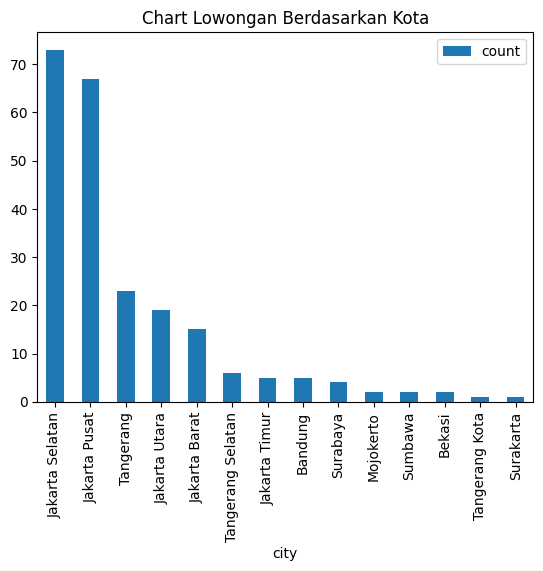

In [25]:
# SUBSET Indonesia GROUP BY city
data_indonesia = data[data['country'] == 'Indonesia'] # ambil negara indonesia saja
data_grouped = pd.DataFrame(data_indonesia['city'].value_counts())
#data_grouped

# membuat plot
data_grouped.plot(kind='bar', title='Chart Lowongan Berdasarkan Kota')

In [26]:
data_grouped

,count
city,
Jakarta Selatan,73
Jakarta Pusat,67
Tangerang,23
Jakarta Utara,19
Jakarta Barat,15
Tangerang Selatan,6
Jakarta Timur,5
Bandung,5
Surabaya,4


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

kesimpulan hasil scrapping 15 halaman pada website kalibrr

1. lowongan di kota jakarta selatan terbanyak, sebanyak 73
2. kota / daerah yang paling sedikit terdapat lowongan pekerjaan terdapat di tangerang kota, surakarta, bekasi, sumbawa
3. lowongan pekerjaan paling banyak di dominasi provinsi DKI Jakarta
4. jarak banyak nya lowongan pekerjaan pada peringkat di atas dan di bawah lumayan jauh, bisa kita asumsikan tidak terjadi pemerataan kegiatan ekonomi
5. lowongan pekerjaan sedikit di dominasi daerah yang cenderung pelosok
6. urutan teratas pada ranking lowongan pekerjaan terbanyak juga di dominasi daerah di sekitar jakarta, bisa kita asumsikan kegiatan ekonomi daerah yang dekat perkotaan berpengaruh, atau saling linear

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 


(Put your analysis and conclusion here.)

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.